# 📊 Customer Churn — Interactive Dashboard

## 🎯 Purpose
This notebook demonstrates how data-driven insights can be **transformed into an interactive dashboard** for business decision-making.  
The dashboard allows stakeholders to **filter**, **visualize**, and **understand churn patterns** without needing technical expertise or code access.

---

## 🧩 Dashboard Overview
The **Streamlit Customer Churn Dashboard** provides a real-time, interactive interface where users can:
- Filter customers by **Internet Service**, **Contract Type**, **Gender**, and **Payment Method**  
- Instantly view changes in:
  - Total customers  
  - Churned customers  
  - Churn rate (%)  
  - Average tenure (months)
- Analyze dynamic visuals such as:
  - **Total churn count**
  - **Monthly & Total charges comparison by churn**
  - **Demographic and contract-based churn trends**

---

## 📈 Business Value
The dashboard simplifies complex churn data into **actionable insights** that support:
- **Data-driven retention strategies**
- **Segmented customer understanding**
- **Executive-level performance tracking**

For non-technical stakeholders:
- They can **explore insights interactively** rather than interpreting static reports.
- Visual filters and charts **make data storytelling intuitive** — helping explain *who is leaving, why, and what can be done about it.*

---

## 💡 Example Insights from Dashboard
| Observation | Interpretation | Business Implication |
|--------------|----------------|----------------------|
| Churn rate is highest among *month-to-month* contracts | Short-term contracts reflect low loyalty | Incentivize upgrades to long-term plans |
| Customers with *high monthly charges* churn more | Perceived poor value or service dissatisfaction | Review pricing & add loyalty discounts |
| *Fiber optic users* show relatively higher churn | Possible service reliability issues | Conduct customer feedback surveys |
| *Electronic payment users* have lower churn | Ease of payment improves retention | Promote seamless billing and payment options |

---

## ⚙️ Technical Implementation
- **Framework:** Streamlit  
- **Data Source:** Cleaned Telco Customer Churn CSV (`df_clean.csv`)  
- **Backend Processing:** Python (Pandas, Numpy)  
- **Visualizations:** Matplotlib & Seaborn integrated into Streamlit components  
- **Caching:** `st.cache_data()` used to optimize data loading performance  

---

## 🚀 Deployment Readiness
The Streamlit app can be deployed via:
- **Streamlit Cloud**, **Render**, or **GitHub Pages (with Streamlit integration)**  
- Optional embedding into company dashboards or internal portals for regular churn monitoring

---

## 📘 Next Steps
- Integrate the dashboard with a **predictive churn model** to display *real-time churn risk scores*.  
- Add **downloadable PDF summaries** for business presentations.  
- Connect to a **live database** (e.g., PostgreSQL) for automated data refreshes.  
- Implement **alerts or notifications** for sudden spikes in churn rate.

---

**Author:** *Lenix Owino Otieno*  
**Tools:** Streamlit | Pandas | Seaborn | Matplotlib | Jupyter Notebook  
**Goal:** Bridge data analysis with business storytelling — making insights accessible, actionable, and visually engaging.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as px


In [ ]:
df = pd.read_csv('/home/lenix/Desktop/C_Churn_Dataset/clean_df.csv')

# Define bins and labels
bins = [-1, 12, 36, df['tenure'].max()]   # -1 so that tenure=0 falls into first bin
labels = ['0-12', '13-36', '37+']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)
print("Tenure group value counts:")
print(df['tenure_group'].value_counts())

In [ ]:
# Step 1 — Group by tenure_group to compute statistics
tenure_stats = (
    df.groupby('tenure_group')
      .agg(
          avg_monthly_charges=('monthly_charges', 'mean'),
          median_monthly_charges=('monthly_charges', 'median'),
          avg_total_charges=('total_charges', 'mean'),
          median_total_charges=('total_charges', 'median'),
          churn_rate=('churn', lambda x: x.mean() * 100)
      )
      .reset_index()
)

print("Tenure group statistics (charges + churn):")
display(tenure_stats)


Tenure group statistics (charges + churn):


/tmp/ipykernel_18234/3516961304.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_group')


,tenure_group,avg_monthly_charges,median_monthly_charges,avg_total_charges,median_total_charges,churn_rate
0,0-12,56.097781,55.900,275.229597,170.875,47.438243
1,13-36,63.248195,69.675,1513.541756,1404.975,25.538793
2,37+,72.008730,80.300,4213.723192,4282.400,11.929357


/tmp/ipykernel_18234/3896550470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


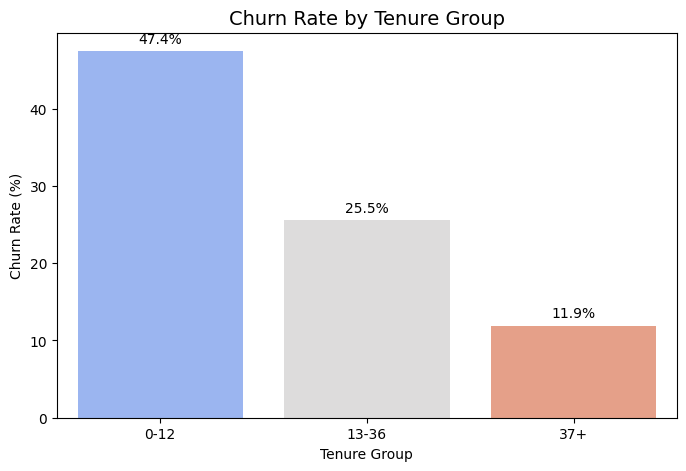

In [ ]:
# Step 2 — Visualization of churn rates by tenure_group

plt.figure(figsize=(8,5))
sns.barplot(
    data=tenure_stats,
    x='tenure_group', 
    y='churn_rate',
    palette='coolwarm'
)
plt.title('Churn Rate by Tenure Group', fontsize=14)
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')

# Annotate bars with churn rates
for i, val in enumerate(tenure_stats['churn_rate']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=10)

plt.show()


In [ ]:
# Churn rate by gender
gender_churn = df.groupby('gender')['churn'].mean().reset_index()
gender_churn['churn'] = gender_churn['churn'] * 100  # convert to %
gender_churn


,gender,churn
0,Female,26.920872
1,Male,26.160338


In [ ]:
# Churn rate by senior citizen
senior_churn = df.groupby('senior_citizen')['churn'].mean().reset_index()
senior_churn['churn'] = senior_churn['churn'] * 100  # convert to %
senior_churn


,senior_citizen,churn
0,0,23.606168
1,1,41.681261


/tmp/ipykernel_18234/2297613105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_churn, x='gender', y='churn', palette='Set2', ax=axes[0])
/tmp/ipykernel_18234/2297613105.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=senior_churn, x='senior_citizen', y='churn', palette='Set1', ax=axes[1])


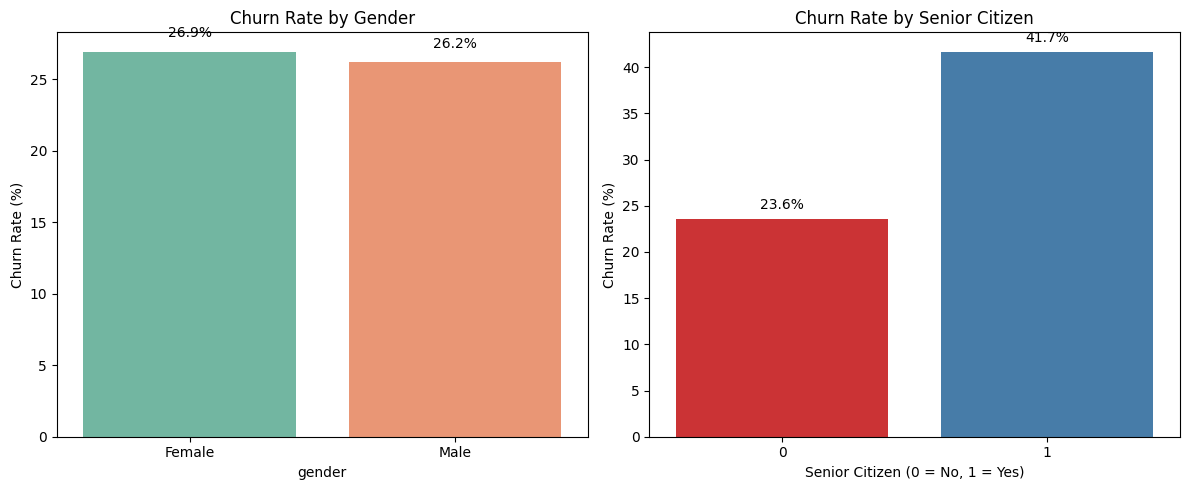

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Gender churn
sns.barplot(data=gender_churn, x='gender', y='churn', palette='Set2', ax=axes[0])
axes[0].set_title('Churn Rate by Gender')
axes[0].set_ylabel('Churn Rate (%)')
for i, val in enumerate(gender_churn['churn']):
    axes[0].text(i, val + 1, f'{val:.1f}%', ha='center')

# Senior citizen churn
sns.barplot(data=senior_churn, x='senior_citizen', y='churn', palette='Set1', ax=axes[1])
axes[1].set_title('Churn Rate by Senior Citizen')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xlabel('Senior Citizen (0 = No, 1 = Yes)')
for i, val in enumerate(senior_churn['churn']):
    axes[1].text(i, val + 1, f'{val:.1f}%', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# Churn rate by contract type
contract_churn = df.groupby('contract')['churn'].mean().reset_index()
contract_churn['churn'] *= 100
contract_churn


,contract,churn
0,Month-to-month,42.709677
1,One-year,11.269518
2,Two-year,2.831858


In [ ]:
# Churn rate by payment method
payment_churn = df.groupby('payment_method')['churn'].mean().reset_index()
payment_churn['churn'] *= 100
payment_churn


,payment_method,churn
0,Bank-transfer-(automatic),16.709845
1,Credit-card-(automatic),15.243101
2,Electronic-check,45.285412
3,Mailed-check,19.106700


/tmp/ipykernel_18234/1628349427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contract_churn, x='contract', y='churn', palette='coolwarm', ax=axes[0])
/tmp/ipykernel_18234/1628349427.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_churn, x='payment_method', y='churn', palette='viridis', ax=axes[1])


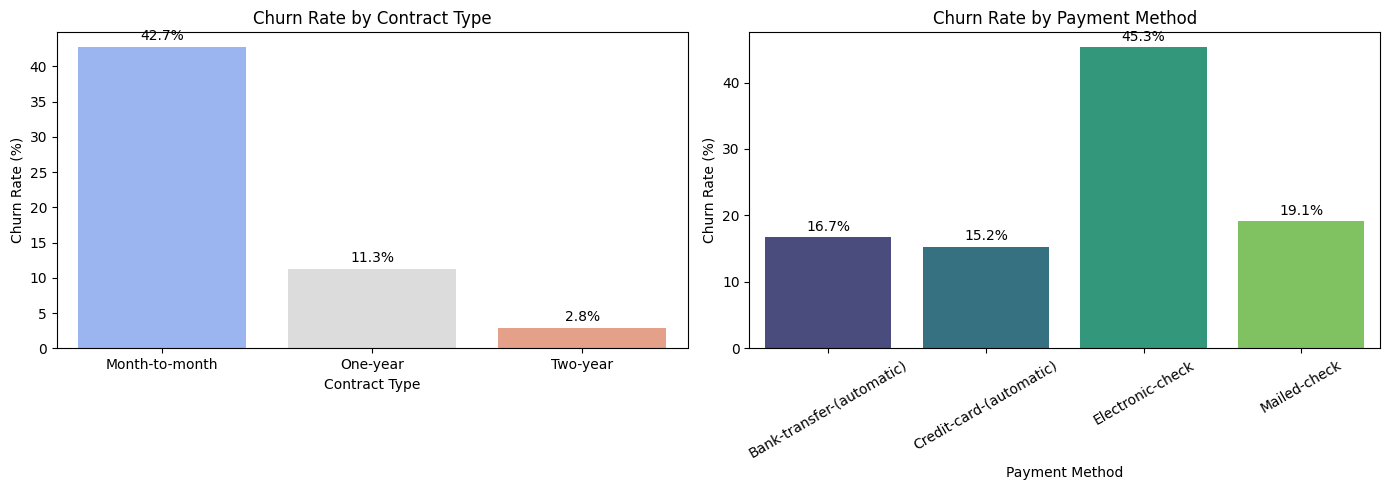

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Contract type churn
sns.barplot(data=contract_churn, x='contract', y='churn', palette='coolwarm', ax=axes[0])
axes[0].set_title('Churn Rate by Contract Type')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_xlabel('Contract Type')
for i, val in enumerate(contract_churn['churn']):
    axes[0].text(i, val + 1, f'{val:.1f}%', ha='center')

# Payment method churn
sns.barplot(data=payment_churn, x='payment_method', y='churn', palette='viridis', ax=axes[1])
axes[1].set_title('Churn Rate by Payment Method')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xlabel('Payment Method')
axes[1].tick_params(axis='x', rotation=30)
for i, val in enumerate(payment_churn['churn']):
    axes[1].text(i, val + 1, f'{val:.1f}%', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
internet_churn = df.groupby('internet_service')['churn'].mean().reset_index()
internet_churn['churn'] *= 100
internet_churn


,internet_service,churn
0,DSL,18.959108
1,Fiber-optic,41.892765
2,No,7.404980


In [ ]:
tech_churn = df.groupby('tech_support')['churn'].mean().reset_index()
tech_churn['churn'] *= 100
tech_churn


,tech_support,churn
0,False,31.186237
1,True,15.166341


/tmp/ipykernel_18234/2360616319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=internet_churn, x='internet_service', y='churn', palette='coolwarm', ax=axes[0])
/tmp/ipykernel_18234/2360616319.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tech_churn, x='tech_support', y='churn', palette='viridis', ax=axes[1])


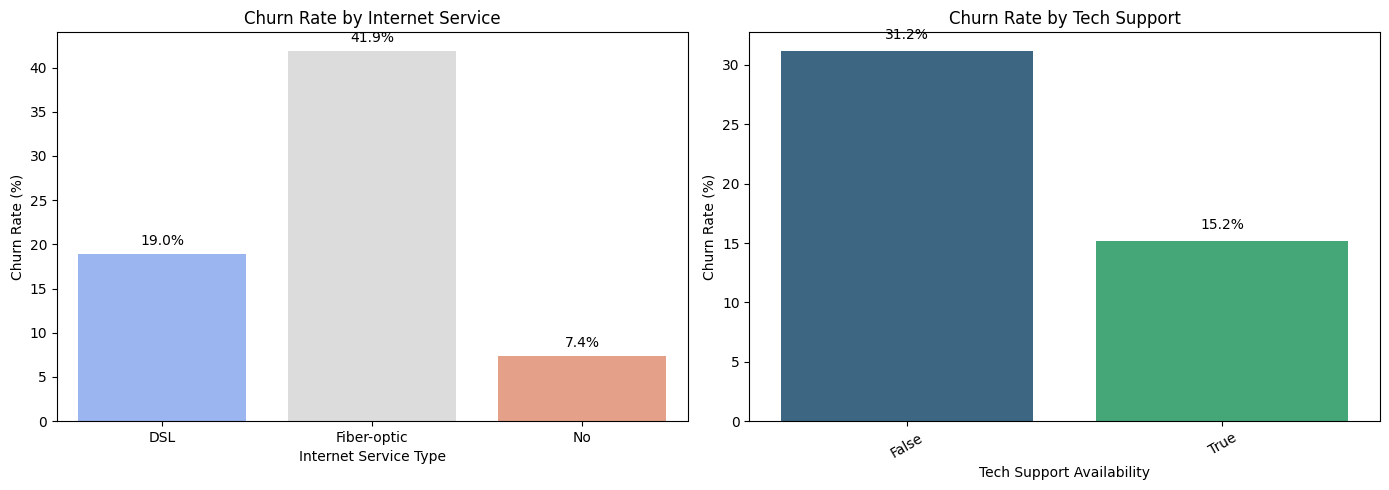

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Internet Service
sns.barplot(data=internet_churn, x='internet_service', y='churn', palette='coolwarm', ax=axes[0])
axes[0].set_title('Churn Rate by Internet Service')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_xlabel('Internet Service Type')
for i, val in enumerate(internet_churn['churn']):
    axes[0].text(i, val + 1, f'{val:.1f}%', ha='center')

# Tech Support
sns.barplot(data=tech_churn, x='tech_support', y='churn', palette='viridis', ax=axes[1])
axes[1].set_title('Churn Rate by Tech Support')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xlabel('Tech Support Availability')
axes[1].tick_params(axis='x', rotation=30)
for i, val in enumerate(tech_churn['churn']):
    axes[1].text(i, val + 1, f'{val:.1f}%', ha='center')

plt.tight_layout()
plt.show()


/tmp/ipykernel_18234/4066290753.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



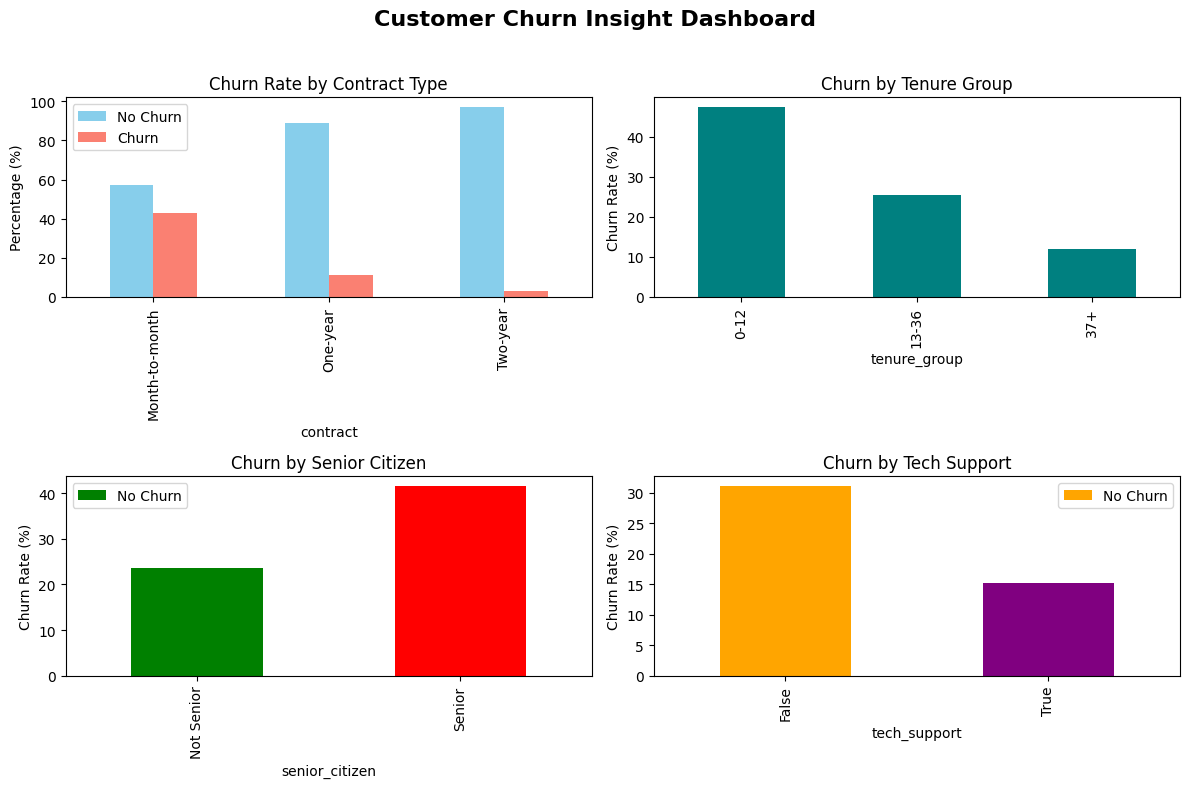

In [ ]:


plt.style.use('seaborn-v0_8-muted')
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Customer Churn Insight Dashboard", fontsize=16, fontweight='bold')

# 1️⃣ Churn by Contract Type
ct_contract = pd.crosstab(df['contract'], df['churn'], normalize='index') * 100
ct_contract.plot(kind='bar', stacked=False, ax=axes[0,0], color=['skyblue', 'salmon'])
axes[0,0].set_title('Churn Rate by Contract Type')
axes[0,0].set_ylabel('Percentage (%)')
axes[0,0].legend(['No Churn', 'Churn'])

# 2️⃣ Churn by Tenure Group
ct_tenure = df.groupby('tenure_group')['churn'].mean() * 100
ct_tenure.plot(kind='bar', color='teal', ax=axes[0,1])
axes[0,1].set_title('Churn by Tenure Group')
axes[0,1].set_ylabel('Churn Rate (%)')

# 3️⃣ Churn by Senior Citizen
ct_senior = df.groupby('senior_citizen')['churn'].mean() * 100
ct_senior.plot(kind='bar', color=['green', 'red'], ax=axes[1,0])
axes[1,0].set_title('Churn by Senior Citizen')
axes[1,0].set_xticklabels(['Not Senior', 'Senior'])
axes[1,0].set_ylabel('Churn Rate (%)')
axes[1,0].legend(['No Churn', 'Churn'])


# 4️⃣ Churn by Tech Support
ct_tech = df.groupby('tech_support')['churn'].mean() * 100
ct_tech.plot(kind='bar', color=['orange', 'purple'], ax=axes[1,1])
axes[1,1].set_title('Churn by Tech Support')
axes[1,1].set_ylabel('Churn Rate (%)')
axes[1,1].legend(['No Churn', 'Churn'])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# --- 1️⃣ Interactive Pie Chart: Churn Distribution ---
fig1 = px.pie(
    df,
    names='churn',
    title='Churn Distribution',
    hole=0.4,
    color='churn',
    color_discrete_map={True: 'salmon', False: 'skyblue'}
)
fig1.update_traces(textinfo='percent+label')

# --- 2️⃣ Churn by Contract Type ---
ct_contract = df.groupby('contract')['churn'].mean().reset_index()
ct_contract['churn'] *= 100
fig2 = px.bar(
    ct_contract,
    x='contract',
    y='churn',
    title='Churn Rate by Contract Type',
    color='contract',
    text=ct_contract['churn'].round(1).astype(str) + '%'
)
fig2.update_layout(yaxis_title='Churn Rate (%)')

# --- 3️⃣ Churn by Tenure Group ---
ct_tenure = df.groupby('tenure_group')['churn'].mean().reset_index()
ct_tenure['churn'] *= 100
fig3 = px.bar(
    ct_tenure,
    x='tenure_group',
    y='churn',
    title='Churn by Tenure Group',
    color='tenure_group',
    text=ct_tenure['churn'].round(1).astype(str) + '%'
)
fig3.update_layout(yaxis_title='Churn Rate (%)')

# --- 4️⃣ Combine Interactive Charts ---
from plotly.subplots import make_subplots

dashboard = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Churn Distribution", "Churn by Contract Type", "Churn by Tenure Group", "Churn by Senior Citizen"),
    specs=[[{"type":"domain"}, {"type":"xy"}],
           [{"type":"xy"}, {"type":"xy"}]]
)

# Pie Chart
dashboard.add_trace(fig1.data[0], row=1, col=1)

# Bar Charts
for trace in fig2.data:
    dashboard.add_trace(trace, row=1, col=2)
for trace in fig3.data:
    dashboard.add_trace(trace, row=2, col=1)

# Senior Citizen Churn
ct_senior = df.groupby('senior_citizen')['churn'].mean().reset_index()
ct_senior['churn'] *= 100
fig4 = px.bar(ct_senior, x='senior_citizen', y='churn', color='senior_citizen')
for trace in fig4.data:
    dashboard.add_trace(trace, row=2, col=2)

dashboard.update_layout(
    title_text="Interactive Customer Churn Dashboard",
    height=800,
    showlegend=False
)

dashboard.show()


/tmp/ipykernel_18234/3464301296.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Compute churn rate by multiple categories ---
def churn_rate_by(df, column):
    temp = df.groupby(column)['churn'].mean().reset_index()
    temp['churn'] = (temp['churn'] * 100).round(2)
    temp.rename(columns={'churn': 'churn_rate'}, inplace=True)
    return temp

# Prepare datasets for different filters
by_contract = churn_rate_by(df, 'contract')
by_gender = churn_rate_by(df, 'gender')
by_internet = churn_rate_by(df, 'internet_service')
by_payment = churn_rate_by(df, 'payment_method')

# --- Create a base figure ---
fig = go.Figure()

# Add all traces (hidden initially except first)
fig.add_trace(go.Bar(
    x=by_contract['contract'], y=by_contract['churn_rate'],
    name='By Contract', marker_color='skyblue', visible=True,
    text=by_contract['churn_rate'], textposition='auto'
))

fig.add_trace(go.Bar(
    x=by_gender['gender'], y=by_gender['churn_rate'],
    name='By Gender', marker_color='salmon', visible=False,
    text=by_gender['churn_rate'], textposition='auto'
))

fig.add_trace(go.Bar(
    x=by_internet['internet_service'], y=by_internet['churn_rate'],
    name='By Internet Service', marker_color='mediumseagreen', visible=False,
    text=by_internet['churn_rate'], textposition='auto'
))

fig.add_trace(go.Bar(
    x=by_payment['payment_method'], y=by_payment['churn_rate'],
    name='By Payment Method', marker_color='orange', visible=False,
    text=by_payment['churn_rate'], textposition='auto'
))

# --- Dropdown Menu for Interactive Selection ---
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            x=1.1,
            y=0.8,
            buttons=list([
                dict(label="Churn by Contract Type",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Churn Rate by Contract Type"}]),
                dict(label="Churn by Gender",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Churn Rate by Gender"}]),
                dict(label="Churn by Internet Service",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Churn Rate by Internet Service"}]),
                dict(label="Churn by Payment Method",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Churn Rate by Payment Method"}]),
            ]),
            showactive=True
        )
    ]
)

# --- General Layout Customization ---
fig.update_layout(
    title="Interactive Customer Churn Analysis Dashboard",
    yaxis_title="Churn Rate (%)",
    xaxis_title="Category",
    template="plotly_white",
    height=600
)

fig.show()
